In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from datetime import datetime

In [4]:
df=pd.read_csv('/content/sample_data/loan_data_set.csv')

In [5]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


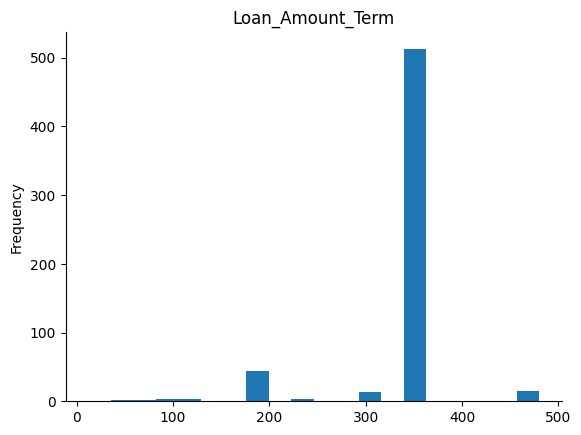

In [6]:
# @title Loan_Amount_Term

from matplotlib import pyplot as plt
df['Loan_Amount_Term'].plot(kind='hist', bins=20, title='Loan_Amount_Term')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
df.shape

(614, 13)

In [ ]:
df.isnull().sum()

,0
Loan_ID,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14


In [ ]:
df['Loan_Status'].value_counts()

,count
Loan_Status,
Y,422
N,192


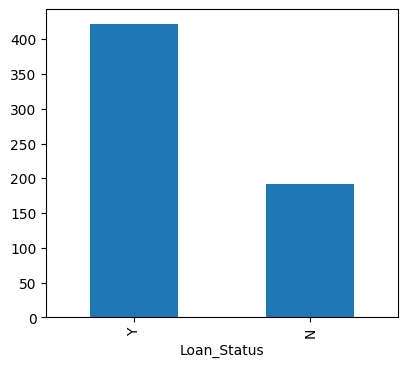

In [ ]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
df['Loan_Status'].value_counts().plot(kind='bar')
plt.show()



<Axes: xlabel='Property_Area'>

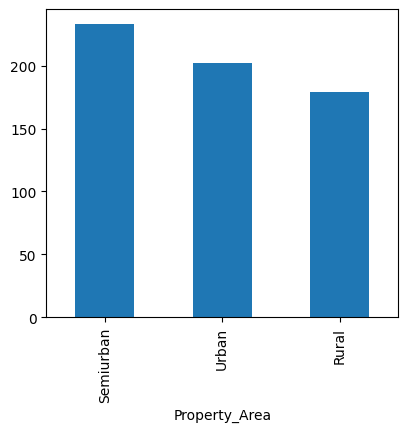

In [ ]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
df['Property_Area'].value_counts().plot(kind='bar')



In [ ]:
df2=pd.read_csv('/content/sample_data/Loan_status.csv')

In [ ]:
df2

,loan_id,loan_status,submission_date,decision_date
0,1,rejected,12/24/2022,6/1/2023
1,2,approved,3/21/2021,1/9/2023
2,3,rejected,6/2/2021,8/24/2023
3,4,approved,7/6/2021,3/22/2023
4,5,rejected,6/16/2020,10/23/2023
...,...,...,...,...
95,96,approved,11/29/2022,8/3/2023
96,97,rejected,12/1/2020,4/28/2023
97,98,approved,2/20/2020,2/19/2023
98,99,rejected,5/14/2020,5/30/2023


In [ ]:
#compute time between submissiontime and decisiontime

# Ensure the columns are in datetime format if they aren't already
df2['submission_date'] = pd.to_datetime (df2['submission_date'])
df2['decision_date'] = pd.to_datetime(df2['decision_date'])

# Compute the difference
df2['Processing_date'] = df2['decision_date'] - df2['submission_date']

# Print the DataFrame to see the new column
print(df2[['submission_date', 'decision_date', 'Processing_date']])


   submission_date decision_date Processing_date
0       2022-12-24    2023-06-01        159 days
1       2021-03-21    2023-01-09        659 days
2       2021-06-02    2023-08-24        813 days
3       2021-07-06    2023-03-22        624 days
4       2020-06-16    2023-10-23       1224 days
..             ...           ...             ...
95      2022-11-29    2023-08-03        247 days
96      2020-12-01    2023-04-28        878 days
97      2020-02-20    2023-02-19       1095 days
98      2020-05-14    2023-05-30       1111 days
99      2022-12-16    2023-10-29        317 days

[100 rows x 3 columns]


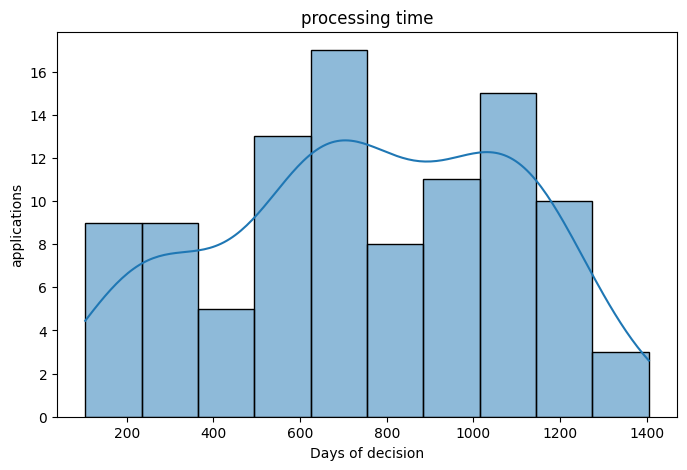

In [ ]:
#Processing time using histogram
plt.figure(figsize=(8,5))
sns.histplot(df2['Processing_date'].dt.days,bins=10,kde=True)
plt.title('processing time')
plt.xlabel('Days of decision')
plt.ylabel('applications')
plt.show()


<ipython-input-56-3822367349>:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




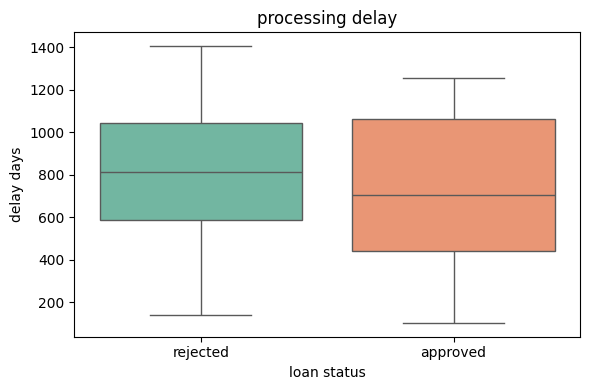

In [ ]:
#Boxplot by status
plt.figure(figsize=(6,4))
sns.boxplot(x='loan_status',y=df2['Processing_date'].dt.days,data=df2,palette='Set2')
plt.title('processing delay')
plt.xlabel('loan status')
plt.ylabel('delay days')
plt.tight_layout()
plt.show()

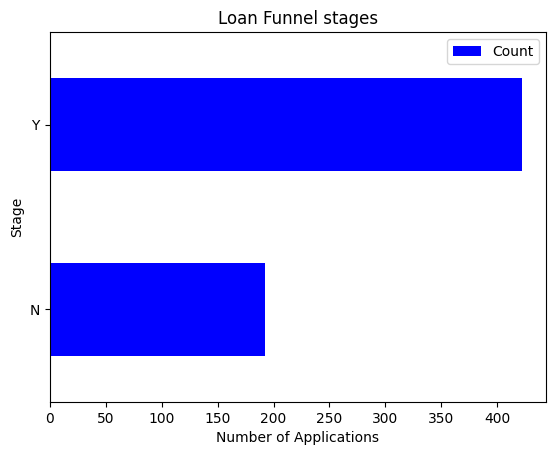

In [9]:
#Funnel Visualizations using matplotlib
loan_status_counts = df['Loan_Status'].value_counts().reset_index()
loan_status_counts.columns = ['loan_status', 'Count']
loan_status_counts.plot(kind='barh', x='loan_status', y='Count', color='blue')
plt.title('Loan Funnel stages')
plt.xlabel('Number of Applications')
plt.ylabel('Stage')
plt.gca().invert_yaxis()
plt.show()

# Note: The second plot command below the first one is redundant and can be removed.
# plt.ylabel('Stage')
# plt.gca().invert_yaxis()
# plt.show()



In [10]:
#Funnel visualisations
import plotly.express as px
status_counts=df['Loan_Status'].value_counts().reset_index()
status_counts.columns=['loan_status','count']
fig=px.funnel(status_counts,x='count',y='loan_status',title='Loan Funnel')
fig.show()



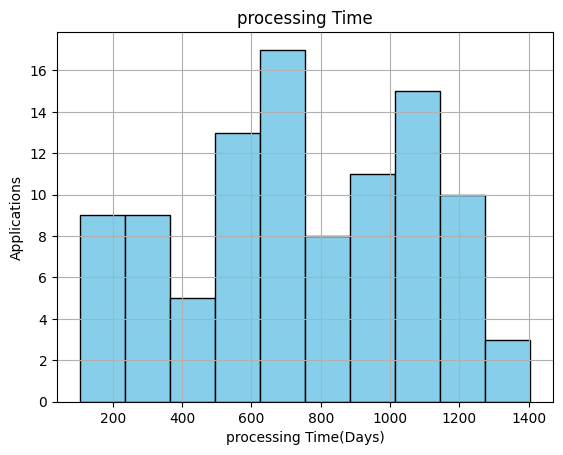

In [ ]:
#Approval time histograms
plt.hist(df2['Processing_date'].dt.days,bins=10,color='skyblue',edgecolor='black')
plt.title('processing Time')
plt.xlabel('processing Time(Days)')
plt.ylabel('Applications')
plt.grid(True)
plt.show()

<ipython-input-19-138495435>:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




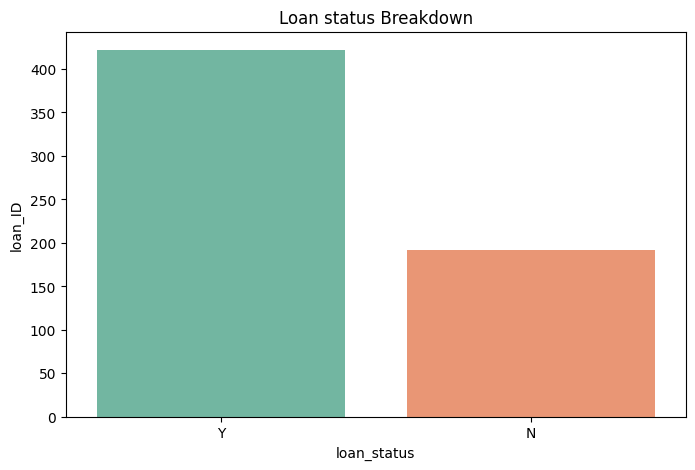

In [19]:
#seaborn for cateogery wise success breakdowns
plt.figure(figsize=(8,5))
sns.countplot(data=df,x='Loan_Status',order=df['Loan_Status'].value_counts().index,palette='Set2')
plt.title('Loan status Breakdown')
plt.xlabel('loan_status')
plt.ylabel("loan_ID")
plt.show()



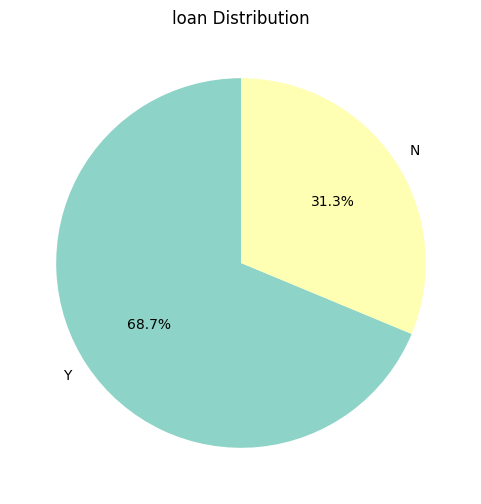

In [11]:
#Pie chart
plt.figure(figsize=(6,6))
df['Loan_Status'].value_counts().plot.pie(autopct='%1.1f%%',startangle=90,colors=sns.color_palette('Set3'))
plt.title('loan Distribution')
plt.ylabel('')
plt.show()

In [ ]:
#Cateogory-wise success breakdowns by gender,martial status,education,number of dependents,loan amount bucket


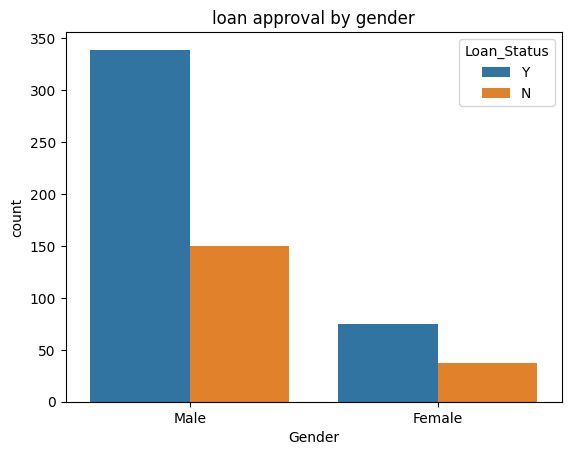

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(data=df,x='Gender',hue='Loan_Status')
plt.title("loan approval by gender")
plt.ylabel("count")
plt.show()

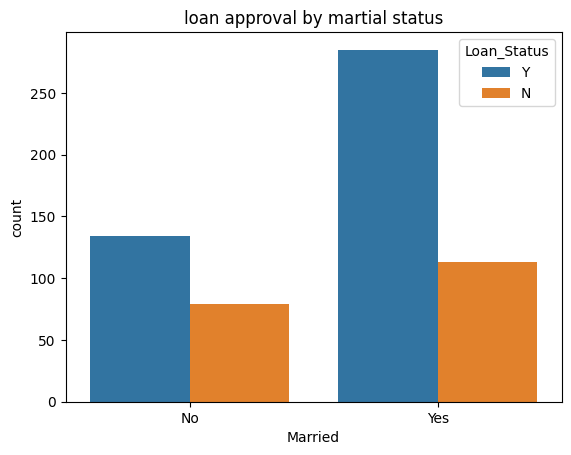

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(data=df,x='Married',hue='Loan_Status')
plt.title("loan approval by martial status")
plt.show()

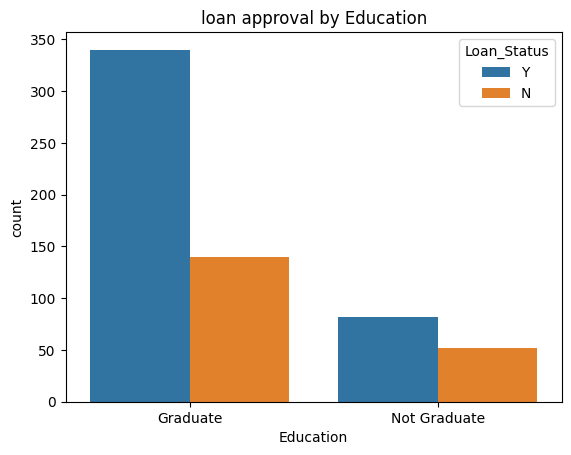

In [15]:
sns.countplot(data=df,x='Education',hue='Loan_Status')
plt.title("loan approval by Education")
plt.show()

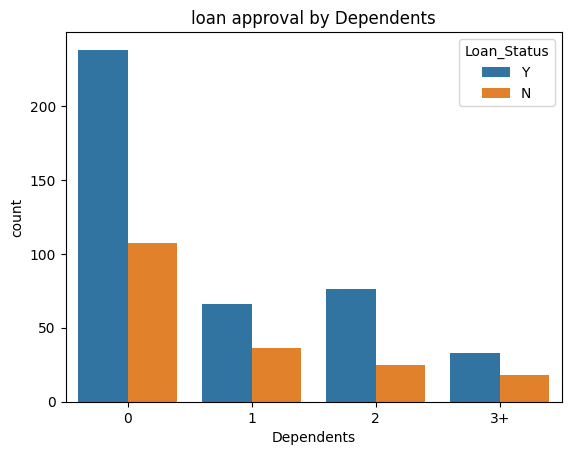

In [17]:
sns.countplot(data=df,x='Dependents',hue='Loan_Status')
plt.title("loan approval by Dependents")
plt.show()